In [1]:
import numpy as np
import scipy
from scipy import misc
from skimage.transform import radon, iradon,iradon_sart
from skimage.draw import line_aa
import cv2
from PIL import Image
from PIL import ImageDraw
import matplotlib.pyplot as plt
import sewar
%matplotlib inline

In [2]:
img = cv2.imread("../images/ball.png",0)

# img = scipy.ndimage.rotate(img, -55)
imgo = np.copy(img)
img = cv2.resize(img,(480,480))
# img = np.ones((480,480), dtype='uint8')*255
imsize = img.shape
print(imsize)

(480, 480)


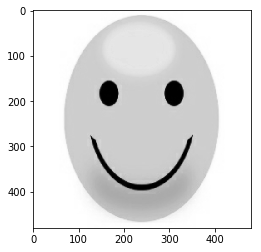

In [3]:
plt.imshow(img, cmap='gray')

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179.]


/usr/local/lib/python3.7/site-packages/skimage/transform/radon_transform.py:69: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


(480, 180)


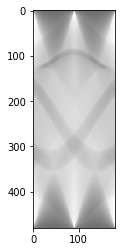

In [4]:
theta1 = np.linspace(0., 180., 180, endpoint=False)
print(theta1)
sinogram1 = radon(img, theta=theta1, circle=True)
plt.imshow(sinogram1, cmap='gray')
imsize = sinogram1.shape
print(imsize)

(480,)
[122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400. 122400.
 122400. 122400. 122400. 122400. 122270. 122252. 122134. 122117. 122128.
 122091. 122085. 121950. 121836. 121567. 121285. 119790. 118459. 117672.
 116974. 116387. 115931. 115636. 115275. 114865. 114488. 114171. 113817.
 113489. 113135. 112838. 112517. 112230. 111938. 111672. 111386. 111164.
 110926. 110711. 110476. 110254. 110052. 109818. 109601. 109318. 109070.
 108863. 108679. 108490. 108298. 108084. 107917. 107790. 107639. 107470.
 107252. 107069. 106846. 106643. 106435. 106268. 106049. 105875. 105705.
 105537. 105332. 105198. 105098. 104990. 104

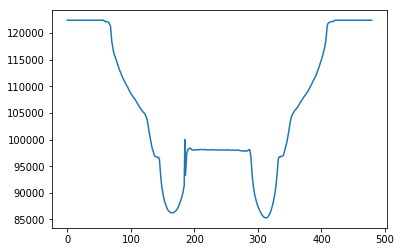

313


In [83]:
b = sinogram1[:,0]
b[185] = 100000
print(b.shape)
print(b)
print(np.mean(b))
plt.plot(b) # plotting by columns
plt.show()
min_idxb = np.argmin(b)
print(min_idxb)

In [92]:
# conv_sz = [101,151,201,251,301]
# iters = (np.shape(conv_sz))[0]
# ans = np.zeros(np.shape(b))
# for i in range(1):
#     lim = conv_sz[i]
#     lim_by_2 = int(lim/2)
#     ans = np.zeros(lim)
#     for j in range(3):
#         print(j)
#         vec = np.zeros((lim,1))
#         vec[j] = 1
#         vec[conv_sz[i]-1-j] = -1
#         print(np.shape(vec))
#         print(np.shape(b))
#         ans = np.add(ans,np.convolve(vec,b,mode='same'))
conv_sz = [101,151,201,251,301]
ans = np.zeros(480)
for i in range(5):
    for j in range(int(conv_sz[i]/2)):
        vec = np.zeros(conv_sz[i])
        vec[j] = 1
        vec[conv_sz[i] - 1 -j] = -1
        ans = np.add(ans, abs(np.convolve(vec,b,mode='same')))
    print(ans)
    print(np.shape(ans))
    print(np.argmin(ans))
    

[6120000. 5997600. 5875200. 5752800. 5630400. 5508000. 5385600. 5263200.
 5140670. 5018122. 4895456. 4772773. 4650101. 4527392. 4404677. 4281827.
 4158863. 4035630. 3912115. 3787105. 3660764. 3533636. 3405810. 3277397.
 3148528. 3019364. 2889839. 2759904. 2629592. 2499223. 2369068. 2238867.
 2108450. 1978516. 1850129. 1730661. 1618107. 1509943. 1404307. 1301565.
 1201315. 1103578. 1008144.  914862.  823598.  734036.  646063.  559569.
  474601.  391488.  309883.  323793.  337895.  352211.  366694.  381304.
  396065.  410995.  426013.  441066.  456206.  471414.  486824.  502375.
  518102.  533862.  549543.  565009.  580129.  593606.  604357.  613098.
  620514.  626906.  632528.  637757.  642695.  647646.  652566.  657536.
  662511.  667497.  672422.  677318.  682078.  686535.  690827.  695035.
  698874.  702238.  705192.  707706.  709835.  711510.  712827.  714016.
  716351.  719642.  723677.  728277.  733176.  738373.  743855.  749427.
  754986.  760592.  766225.  771854.  777359.  7827

In [8]:
sinogram1t = np.flipud(sinogram1)
diff = np.abs(sinogram1 - sinogram1t)
diff_col = np.mean(diff,axis=0)
print(diff_col)
print(np.shape(diff_col))
min_idx = np.argmin(diff_col)
print(min_idx)

[ 514.40833333  419.38063574  599.78292112  871.25527924 1154.62839635
 1429.97551016 1695.34031565 1945.48125669 2183.06638563 2408.91545314
 2622.75494536 2825.42003896 3021.11959294 3208.970289   3388.91805704
 3558.19122005 3719.0308455  3869.22818687 4011.36217677 4146.80525569
 4269.12929977 4372.45388739 4466.93628784 4553.17555577 4630.54446906
 4707.7537783  4785.4593799  4858.98126393 4933.19756664 5006.08968341
 5083.97912832 5165.84345259 5249.51988498 5332.75124705 5412.80255526
 5489.76697166 5560.65257114 5625.10203717 5658.00090201 5659.11181601
 5639.81056297 5608.87601698 5570.03820638 5520.94555472 5466.79540368
 5407.67923494 5336.65189989 5262.12944195 5180.9723901  5101.30621876
 5020.97246623 4940.5757075  4861.61927818 4982.51676784 5142.17275542
 5293.81626268 5439.81391872 5578.3908286  5715.48047421 5852.69259564
 5989.66128624 6124.19546328 6251.06767648 6369.52359091 6483.64607106
 6588.24350534 6683.19327363 6772.35524388 6865.7313621  6975.1180448
 7070.1

In [169]:
count = 0
d = np.zeros(30)
for i in range(1,179):
    if(diff_col[i] < diff_col[i-1] and diff_col[i] < diff_col[i+1] and diff_col[i]<diff_col[min_idx] *5):
        print(i)
        d[count]=i
        count=count+1;
print("count", count)

12
27
34
49
52
61
75
104
107
145
149
151
156
169
175
count 15


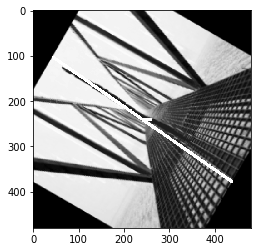

In [196]:
# img = cv2.imread("../images/ball90.png",0)
img = np.copy(imgo)
img = cv2.resize(img,(480,480))
for i in range(count):    
    c0 = np.rint(240*np.cos(((180-55)/180)*3.14)).astype(int)
    s0 = np.rint(240*np.sin(((180-55)/180)*3.14)).astype(int)
#     print(s0)
#     print(c0)
    img = cv2.line(img,(240 + s0,240 - c0),(240 - s0,240 + c0),(255,255,255),5)
    img = cv2.line(img,(240,240),(260,240),(255,255,255),5)
    plt.imshow(img, cmap='gray')



In [61]:
a = [1, 2, 3, 4,3,2,3,5,6,7,1 ]
b = [1 ,0 ,-1]
c = np.convolve(a,b,mode='same')
print(c)

[ 2  2  2  0 -2  0  3  3  2 -5 -7]
